# MNIST Neural Net
My Attempt in using tensorflow to predict the mnist dataset

based on tutorials on tensor flow website https://www.tensorflow.org/versions/0.6.0/tutorials/mnist/beginners/index.html

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
train_iter = 1000
batch_size = 100

### Getting data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Setting up Neural Network 

In [4]:
def create_neural_net_layer(X, n_in, n_out, activation=tf.nn.sigmoid):
    W = tf.Variable(tf.random_uniform([n_in, n_out]))
    b = tf.Variable(tf.random_uniform([n_out]))
    y = activation(tf.matmul(x, W)+b)
    return y

In [5]:
hidden_layer = create_neural_net_layer(x, 784, 784, tf.nn.relu)
output_layer = create_neural_net_layer(hidden_layer, 784, 10, tf.nn.softmax)

### Setting optimizer to reduce loss

In [6]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.log(output_layer), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

### Training the model

In [7]:
test_accuracies = []
train_accuracies = []
iters = []

session = tf.Session()
session.run(tf.initialize_all_variables())
for i in range(1, train_iter+1):
    #training data
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    session.run(train_step, feed_dict={x: batch_x, y:batch_y})
    
    #print accuracy result
    if i % 10 == 0:
        correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(output_layer,1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
        train_accuracy = session.run(accuracy, feed_dict={x: mnist.test.images, y:mnist.test.labels})
        test_accuracy = session.run(accuracy, feed_dict={x: batch_x, y:batch_y})
        
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        iters.append(i)

### Training Iteration Result

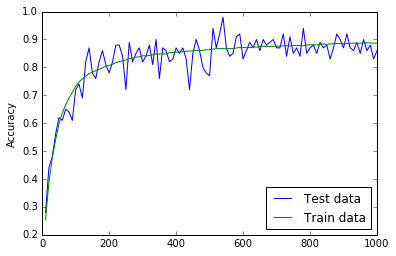

In [8]:
plot_test = plt.plot(iters, test_accuracies, label="Test data")
plot_train = plt.plot(iters, train_accuracies, label="Train data")

plt.legend(loc=4)
plt.ylabel('Accuracy')

plt.show()